<a href="https://colab.research.google.com/github/ABHIJATSARARI/Data-Science-Project-with-Python/blob/main/Bike_Sharing_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Bike Sharing Demand Forecasting***

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn plotly ipywidgets dash


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a URL
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427  

In [3]:
# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year, month, day, hour from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday

# Drop the 'casual' and 'registered' columns (as 'count' is the target)
df = df.drop(['casual', 'registered'], axis=1)

# Feature Scaling (for some machine learning algorithms)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['temp', 'atemp', 'humidity', 'windspeed']])
scaled_df = pd.DataFrame(scaled_features, columns=['temp_scaled', 'atemp_scaled', 'humidity_scaled', 'windspeed_scaled'])

# Concatenate the scaled features back to the original dataframe
df = pd.concat([df, scaled_df], axis=1)

# Drop the old columns
df = df.drop(['temp', 'atemp', 'humidity', 'windspeed'], axis=1)

# Display the modified dataframe
print(df.head())


             datetime  season  holiday  workingday  weather  count  year  \
0 2011-01-01 00:00:00       1        0           0        1     16  2011   
1 2011-01-01 01:00:00       1        0           0        1     40  2011   
2 2011-01-01 02:00:00       1        0           0        1     32  2011   
3 2011-01-01 03:00:00       1        0           0        1     13  2011   
4 2011-01-01 04:00:00       1        0           0        1      1  2011   

   month  day  hour  weekday  temp_scaled  atemp_scaled  humidity_scaled  \
0      1    1     0        5    -1.333661     -1.092737         0.993213   
1      1    1     1        5    -1.438907     -1.182421         0.941249   
2      1    1     2        5    -1.438907     -1.182421         0.941249   
3      1    1     3        5    -1.333661     -1.092737         0.681430   
4      1    1     4        5    -1.333661     -1.092737         0.681430   

   windspeed_scaled  
0         -1.567754  
1         -1.567754  
2         -1.567754 

Mean Squared Error: 3502.813590449954


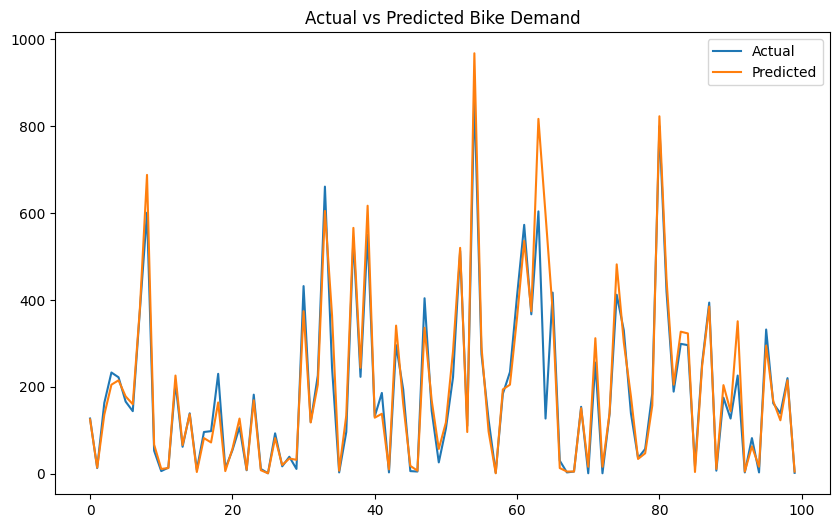

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df[['hour', 'weather', 'temp_scaled', 'humidity_scaled', 'windspeed_scaled',
        'month', 'weekday', 'year', 'holiday', 'workingday']]
y = df['count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Build the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Bike Demand')
plt.show()


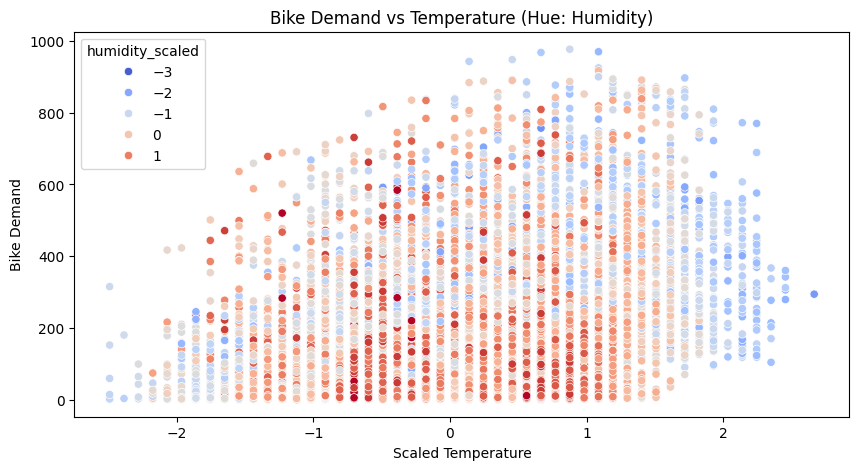

In [5]:
import seaborn as sns

# Scatter plot for temperature vs bike demand (using scaled temperature)
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp_scaled', y='count', data=df, hue='humidity_scaled', palette='coolwarm')
plt.title('Bike Demand vs Temperature (Hue: Humidity)')
plt.xlabel('Scaled Temperature')  # Update x-axis label
plt.ylabel('Bike Demand')
plt.show()

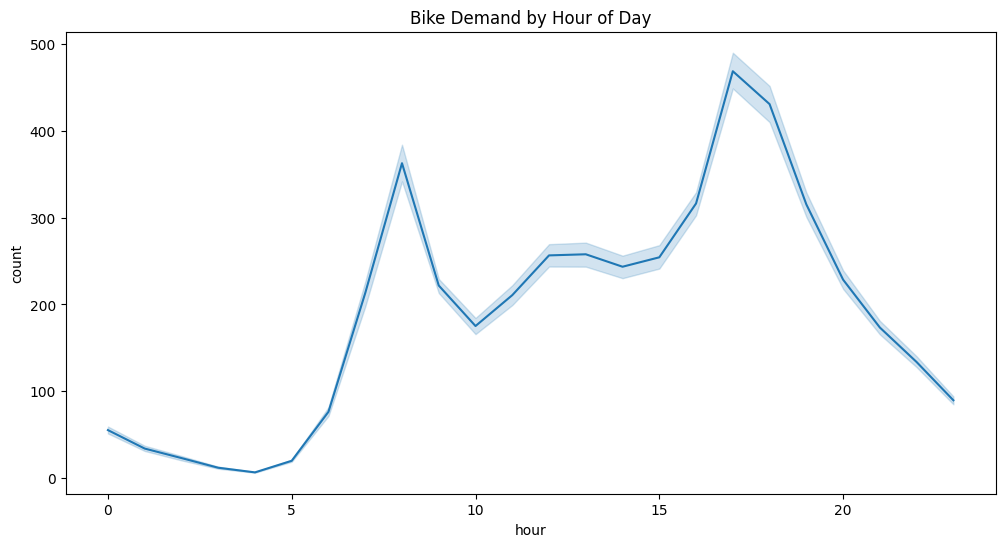

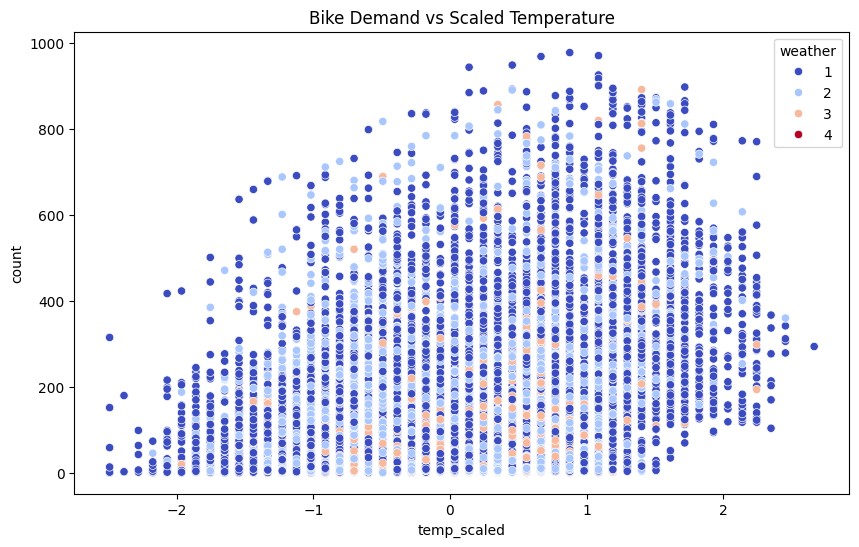

In [6]:
# Temporal Line Chart
plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='count', data=df)
plt.title('Bike Demand by Hour of Day')
plt.show()

# Weather-Dependent Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp_scaled', y='count', hue='weather', palette='coolwarm', data=df)
plt.title('Bike Demand vs Scaled Temperature')
plt.show()

# Interactive Map (using plotly express)
import plotly.express as px

# Assume we have 'lat' and 'lon' columns for bike locations (for demonstration purposes)
df['lat'] = 38.89511  # example latitude for all points
df['lon'] = -77.03637  # example longitude for all points

fig = px.scatter_mapbox(df, lat="lat", lon="lon", size="count", color="count",
                        mapbox_style="open-street-map", zoom=12, title="Bike Demand at Different Locations")
fig.show()


In [11]:
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set a new vibrant theme
background_color = '#1e1e2f'
primary_color = '#d72638'
secondary_color = '#1b998b'
accent_color = '#2f4b7c'
font_color = '#f6f6f6'
hover_color = '#34354a'
title_font_size = '28px'

# Styling function for widgets with hover effects and no borders
def set_widget_style(widget, width='100%', height='45px', bg_color=primary_color, text_color=font_color, description_width='130px'):
    widget.layout.width = width
    widget.layout.height = height
    widget.layout.justify_content = 'center'
    widget.style.background = bg_color
    widget.style.color = text_color
    widget.style.font_family = 'Arial'
    widget.style.font_size = '15px'
    widget.style.border_radius = '5px'
    widget.layout.padding = '8px'
    widget.style.text_align = 'center'
    widget.style.description_width = description_width

    # Add hover effect through CSS styling, remove border
    widget.add_class('custom-widget-style')
    widget.add_class('hover-style')

# Center the title with glowing effect and increased size
title = widgets.HTML(value=f"""
<h1 style='color:{accent_color}; text-align:center; font-family:Arial; text-shadow: 0 0 15px {primary_color}; font-size:{title_font_size};'>
    Bike Sharing Demand Prediction
</h1>
""")

# Adding icons to each widget for better UI/UX and aligning labels
hour_slider = widgets.IntSlider(value=12, min=0, max=23, description='⏰ Hour:', continuous_update=False)
set_widget_style(hour_slider, width='100%', description_width='130px')

weather_dropdown = widgets.Dropdown(options=[('Clear', 1), ('Cloudy', 2), ('Light Rain/Snow', 3), ('Heavy Rain/Snow', 4)], value=1)
weather_dropdown.description = '☀️ Weather:'
set_widget_style(weather_dropdown, width='100%', description_width='130px')

temp_slider = widgets.FloatSlider(value=0.5, min=-3, max=3, step=0.1, description='🌡️ Temp:')
set_widget_style(temp_slider, width='100%', description_width='130px')

humidity_slider = widgets.FloatSlider(value=0.5, min=-3, max=3, step=0.1, description='💧 Humidity:')
set_widget_style(humidity_slider, width='100%', description_width='130px')

windspeed_slider = widgets.FloatSlider(value=0.5, min=-3, max=3, step=0.1, description='🌬️ Windspeed:')
set_widget_style(windspeed_slider, width='100%', description_width='130px')

month_dropdown = widgets.Dropdown(options=[(i, i) for i in range(1, 13)], value=6)
month_dropdown.description = '📅 Month:'
set_widget_style(month_dropdown, width='100%', description_width='130px')

weekday_dropdown = widgets.Dropdown(options=[('Mon', 0), ('Tue', 1), ('Wed', 2), ('Thu', 3), ('Fri', 4), ('Sat', 5), ('Sun', 6)], value=2)
weekday_dropdown.description = '📆 Weekday:'
set_widget_style(weekday_dropdown, width='100%', description_width='130px')

year_dropdown = widgets.Dropdown(options=[2011, 2012], value=2011)
year_dropdown.description = '🗓️ Year:'
set_widget_style(year_dropdown, width='100%', description_width='130px')

holiday_slider = widgets.IntSlider(value=0, min=0, max=1, description='🎉 Holiday:')
set_widget_style(holiday_slider, width='100%', description_width='130px')

workingday_slider = widgets.IntSlider(value=1, min=0, max=1, description='🏢 Working Day:')
set_widget_style(workingday_slider, width='100%', description_width='130px')

# Predict Button with hover effect and bigger size
predict_button = widgets.Button(description="Predict Demand", button_style='success', layout=widgets.Layout(width='70%', height='50px'))
set_widget_style(predict_button, bg_color=accent_color, text_color='#ffffff', description_width='130px')

# Output for predicted bike demand
predicted_label = widgets.HTML(value=f"<h2 style='color:{secondary_color}; font-family:Arial; width:auto'>Predicted Demand: --</h2>")

# Output display for plots
output = widgets.Output()

# Loading a bike image from local storage (ensure the path exists)
bike_image_path = "/content/pp.png"  # Adjust this path as needed to point to the image
if os.path.exists(bike_image_path):
    with open(bike_image_path, "rb") as file:
        bike_image_data = file.read()
    bike_image = widgets.Image(value=bike_image_data, format='png', layout=widgets.Layout(width='auto', height='auto'))
else:
    bike_image = widgets.HTML("<p style='color:red;'>Bike image not found. Please provide a valid path.</p>")

# Define the event handler for predictions
def on_predict_button_clicked(b):
    with output:
        output.clear_output()

        # Simulate a prediction (replace with actual model)
        predicted_demand = np.random.randint(50, 500)
        predicted_label.value = f"<h2 style='color:{secondary_color}; font-family:Arial;'>Predicted Demand: {predicted_demand} bikes</h2>"

        # Generate and display graphs side by side
        plot_side_by_side_graphs()

predict_button.on_click(on_predict_button_clicked)

# Plot functions for visualization
def plot_side_by_side_graphs():
    with output:
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

        # Set background color for plots
        fig.patch.set_facecolor(background_color)

        # Plot 1: Model Performance
        sns.lineplot(x=np.arange(1, 101), y=np.random.randint(50, 500, size=100), color=primary_color, label='Actual', ax=axs[0])
        sns.lineplot(x=np.arange(1, 101), y=np.random.randint(50, 500, size=100), color=secondary_color, label='Predicted', ax=axs[0])
        axs[0].fill_between(np.arange(1, 101), 0, np.random.randint(50, 500, size=100), color=primary_color, alpha=0.3)
        axs[0].set_title('Model Performance: Actual vs Predicted', fontsize=16, color=font_color)
        axs[0].set_xlabel('Sample Points', fontsize=12)
        axs[0].set_ylabel('Bike Demand', fontsize=12)
        axs[0].legend()
        axs[0].grid(True, alpha=0.3)

        # Plot 2: Temperature vs Demand
        sns.scatterplot(x=np.random.normal(0, 1, size=100), y=np.random.randint(50, 500, size=100), color=accent_color, ax=axs[1])
        axs[1].set_title('Temperature vs Bike Demand', fontsize=16, color=font_color)
        axs[1].set_xlabel('Scaled Temperature', fontsize=12)
        axs[1].set_ylabel('Bike Demand', fontsize=12)
        axs[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Signature at the bottom
signature = widgets.HTML(value=f"""
<h3 style='color:{secondary_color}; text-align:center; font-family:Arial;'>
    Created by AI Innovators
</h3>
""")

# Arrange the layout with the bike image, input widgets, and predictions
dashboard_layout = widgets.VBox([
    title,
    widgets.HBox([
        bike_image,
        widgets.GridBox([
            hour_slider, weather_dropdown, temp_slider, humidity_slider, windspeed_slider,
            month_dropdown, weekday_dropdown, year_dropdown, holiday_slider, workingday_slider,
            predict_button, predicted_label
        ], layout=widgets.Layout(grid_template_columns="repeat(2, 50%)"))
    ], layout=widgets.Layout(width='auto', justify_content='space-between', align_items='center')),
    output,
    signature  # Signature at the bottom
])

# Create a wrapper with a background color
wrapper = widgets.Box(children=[dashboard_layout], layout=widgets.Layout(
    border='solid 2px',
    border_color=primary_color,
    padding='20px',
    background_color=background_color,
    width='auto',
    hight='auto'
))

# Display the enhanced dashboard layout
display(wrapper)

# Custom hover and widget CSS styling
display(HTML('''
    <style>
    .custom-widget-style {
        border: none !important;
        text-align: center;
    }
    .hover-style:hover {
        background-color: #424242 !important;
    }
    </style>
'''))


Box(children=(VBox(children=(HTML(value="\n<h1 style='color:#2f4b7c; text-align:center; font-family:Arial; tex…

# **HAPPY COADING**